# Results

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray
from aws.data import Profiles

In [2]:
results = xarray.open_dataset("../../data/retrieval_results.nc", "Retrieval")
profiles = Profiles("../../data/c_of_2015_204_12.mat")

In [3]:
z = profiles.get_altitude_field()
lat = profiles.get_latitudes().reshape(-1, 1)
lat = np.broadcast_to(lat, z.shape)

In [4]:
profiles.file["C"]["lat"]

<HDF5 dataset "lat": shape (62, 1), type "|O">

## Fitted observations

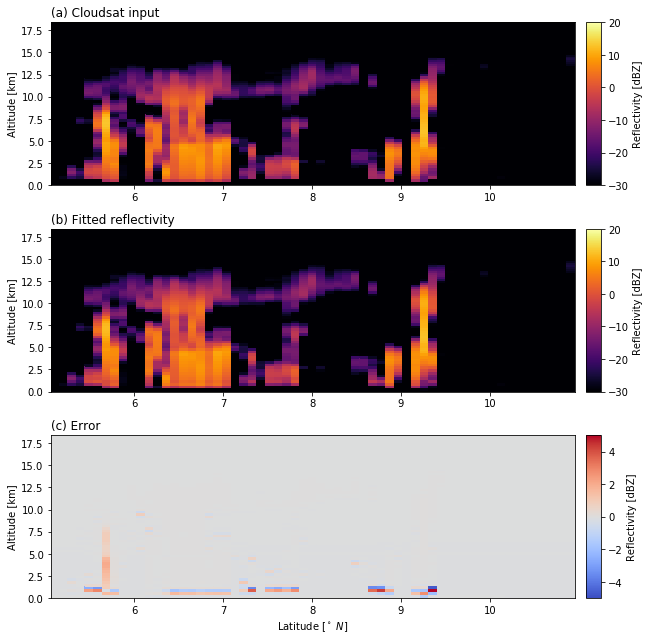

In [5]:
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec

f = plt.figure(figsize = (9, 9))
gs = GridSpec(3, 2, width_ratios=[1.0, 0.03])

norm_dbz = Normalize(-30, 20)
cmap = "inferno"
norm_error = Normalize(-5, 5)
cmap_error = "coolwarm"

# Cloudsat dBZ
ax = plt.subplot(gs[0, 0])
img = ax.pcolormesh(lat, z / 1e3, results.y_cloudsat, norm=norm_dbz, cmap=cmap)
ax.set_title("(a) Cloudsat input", loc="left")
cax = plt.subplot(gs[0, 1])
plt.colorbar(img, label="Reflectivity [dBZ]", cax=cax)
ax.set_ylabel("Altitude [km]")

# Fitted dBZ
ax = plt.subplot(gs[1, 0])
img = ax.pcolormesh(lat, z / 1e3, results.yf_cloudsat, norm=norm_dbz, cmap=cmap)
ax.set_title("(b) Fitted reflectivity", loc="left")
cax = plt.subplot(gs[1, 1])
plt.colorbar(img, label="Reflectivity [dBZ]", cax=cax)
ax.set_ylabel("Altitude [km]")

# Error
ax = plt.subplot(gs[2, 0])
dy = results.y_cloudsat - results.yf_cloudsat
img = ax.pcolormesh(lat, z / 1e3, dy, norm=norm_error, cmap=cmap_error)
ax.set_title("(c) Error", loc="left")
cax = plt.subplot(gs[2, 1])
plt.colorbar(img, label="Reflectivity [dBZ]", cax=cax)
ax.set_ylabel("Altitude [km]")
ax.set_xlabel("Latitude [$^\circ\ N$]")

plt.tight_layout()

## Retrieval results

/home/simonpf/build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide


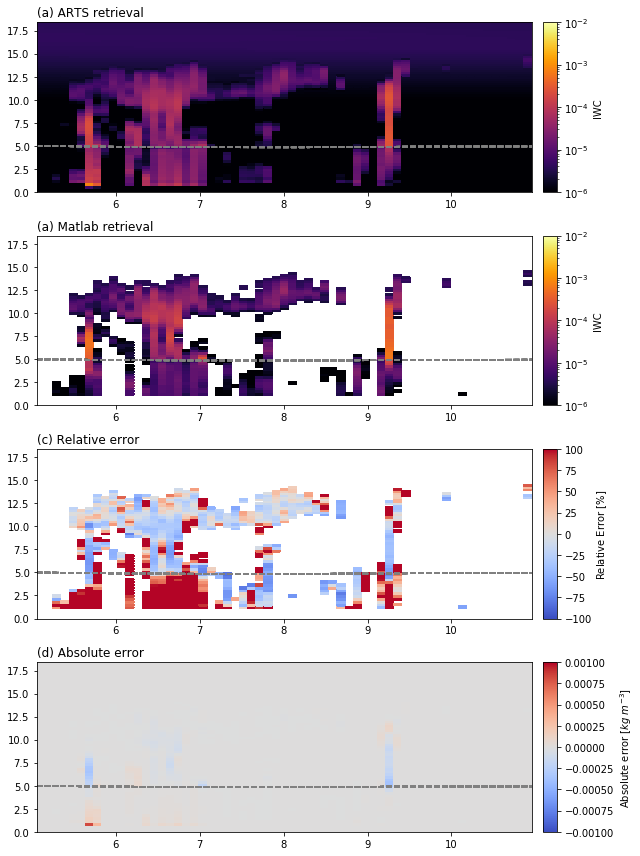

In [15]:
from matplotlib.colors import LogNorm

f = plt.figure(figsize = (9, 12))
gs = GridSpec(4, 2, width_ratios=[1.0, 0.03])
norm_wc = LogNorm(1e-6, 1e-2)
norm_error = Normalize(-100, 100)

# Freezing layer
t = profiles.get_temperature_field()
fl = np.zeros(z.shape[0])
for i in range(z.shape[0]):
    fl[i] = np.interp(273.15, t[i, ::-1], z[i, ::-1])
    
# ARTS retrieval
ax = plt.subplot(gs[0, 0])
wc_arts = np.array(results.ice_water_content + results.rain_water_content)
img = ax.pcolormesh(lat, z / 1e3, wc_arts, norm=norm_wc, cmap=cmap)
ax.set_title("(a) ARTS retrieval", loc = "left")
plt.plot(lat, fl / 1e3, c="grey", ls="--")
ax.set_ylabel("Altitude [km]")

cax = plt.subplot(gs[0, 1])
plt.colorbar(img, label="IWC", cax=cax)

# Matlab retrieval
ax = plt.subplot(gs[1, 0])
wc_matlab = profiles.get_ice_water_content_field()
wc_matlab += profiles.get_rain_water_content_field()
img = ax.pcolormesh(lat, z / 1e3, wc_matlab, norm=norm_wc, cmap=cmap)
ax.set_title("(a) Matlab retrieval", loc = "left")
plt.plot(lat, fl / 1e3, c="grey", ls="--")
ax.set_ylabel("Altitude [km]")

cax = plt.subplot(gs[1, 1])
plt.colorbar(img, label="IWC", cax=cax)

# Differences
ax = plt.subplot(gs[2, 0])
re = (wc_arts - wc_matlab) / wc_matlab * 100.0
img = ax.pcolormesh(lat, z / 1e3, re, norm=norm_error, cmap=cmap_error)
ax.set_title("(c) Relative error", loc = "left")
plt.plot(lat, fl / 1e3, c="grey", ls="--")
ax.set_ylabel("Altitude [km]")

cax = plt.subplot(gs[2, 1])
plt.colorbar(img, label="Relative Error [$\%$]", cax=cax)


ax = plt.subplot(gs[3, 0])
re = (wc_arts - wc_matlab)
img = ax.pcolormesh(lat, z / 1e3, re, norm=Normalize(-1e-3, 1e-3), cmap=cmap_error)
ax.set_title("(d) Absolute error", loc = "left")
plt.plot(lat, fl / 1e3, c="grey", ls="--")

cax = plt.subplot(gs[3, 1])
plt.colorbar(img, label="Absolute error [$kg\ m^{-3}$]", cax=cax)

plt.tight_layout()

plt.tight_layout()